In [1]:
from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt

scenario_params = {"end_year": 2100,
                   "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2        
                   "gdp_assumption": "constant_ratio" #this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
            }

scenario_1 = Scenario(scenario_params)
scenario_1.compute_country_scenario_params()
scenario_1.run()

### Plot global quantities as a first check

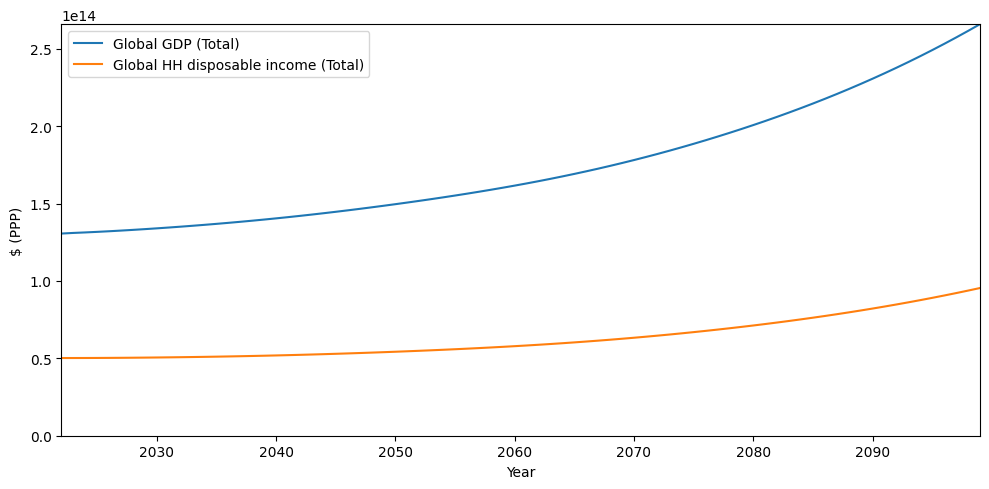

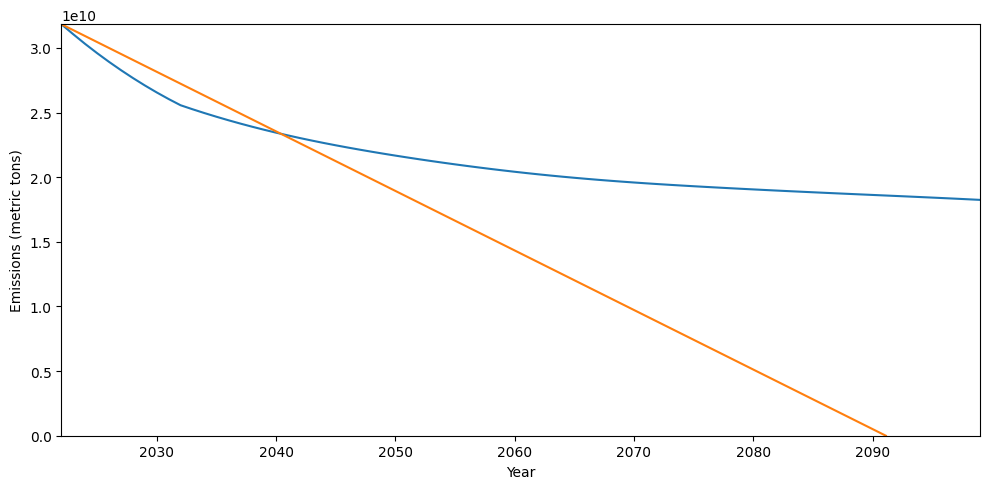

In [2]:
plotting_1 = Plots(scenario_1) # the current scenario must be passed to the plotting class to be able to plot the results
plotting_1.plot_global_economy()
plotting_1.plot_global_emissions()

### Plot example country, here the United States

[2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099]
[1085.821325445616, 1109.7139444645463, 1134.3085918778984, 1159.629904229417, 1185.7034804863322, 1212.5559225459526, 1240.2148775486735, 1268.7090820818387, 1298.0684083629878, 1328.3239124953257, 1359.5078848927822, 1391.6539029767782, 1424.7968862517996, 1458.9731538721298, 1494.2204848175902, 1530.5781808019303, 1568.0871320435772, 1606.789886034848, 1646.7307194524278, 1687.955713358974, 1730.5128318531074, 1774.4520043328412, 1819.8252115456726, 1866.6865756071716, 1915.0924541789198, 1965.1015390061766, 2016.774959025

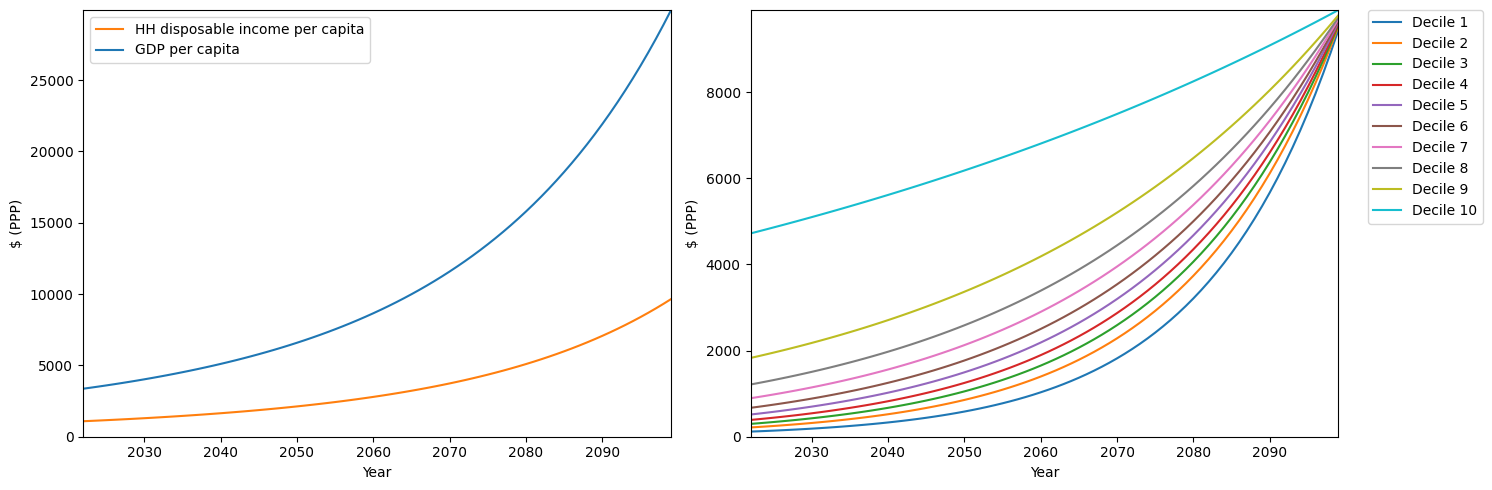

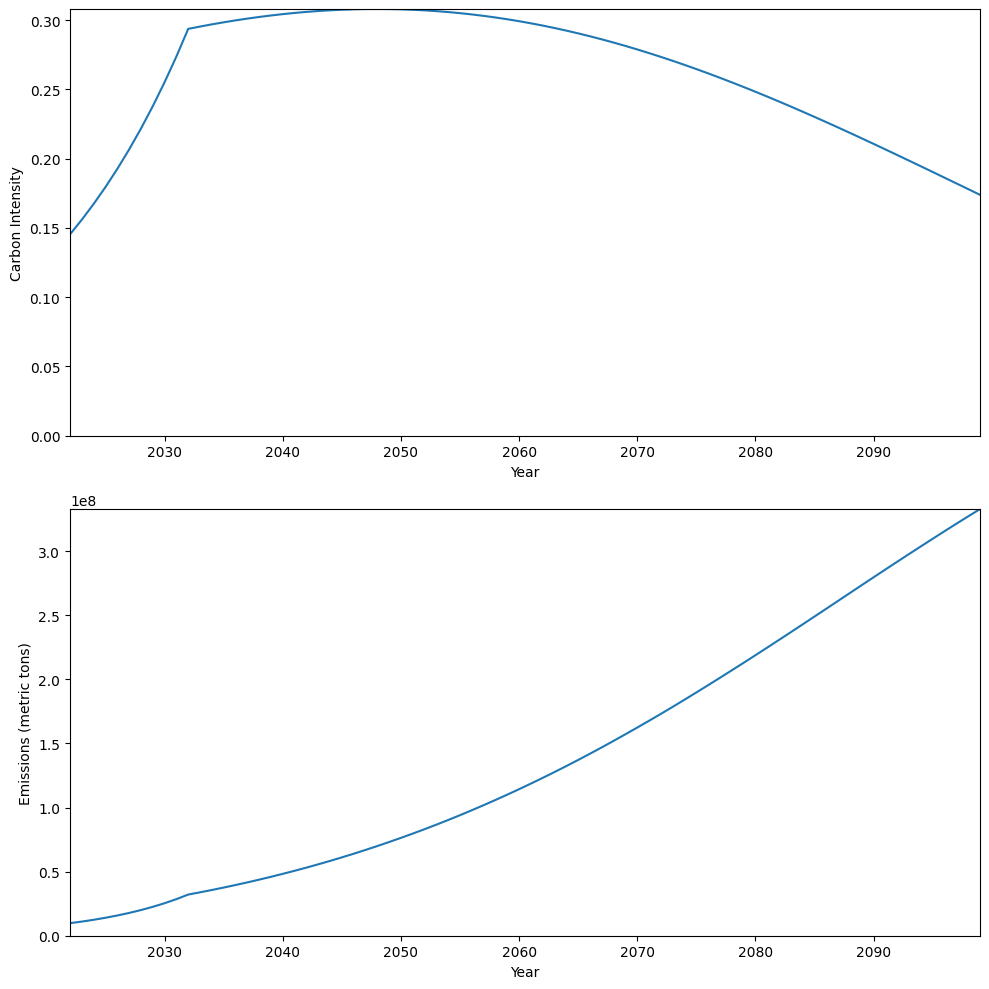

In [3]:
plotting_1.plot_country_economy("Zambia")
plotting_1.plot_country_emissions("Zambia")

### Run a first parameter space sweep by running the trade-off between final time of convergence and convergence level and its influence of how far the carbon budget is overshot

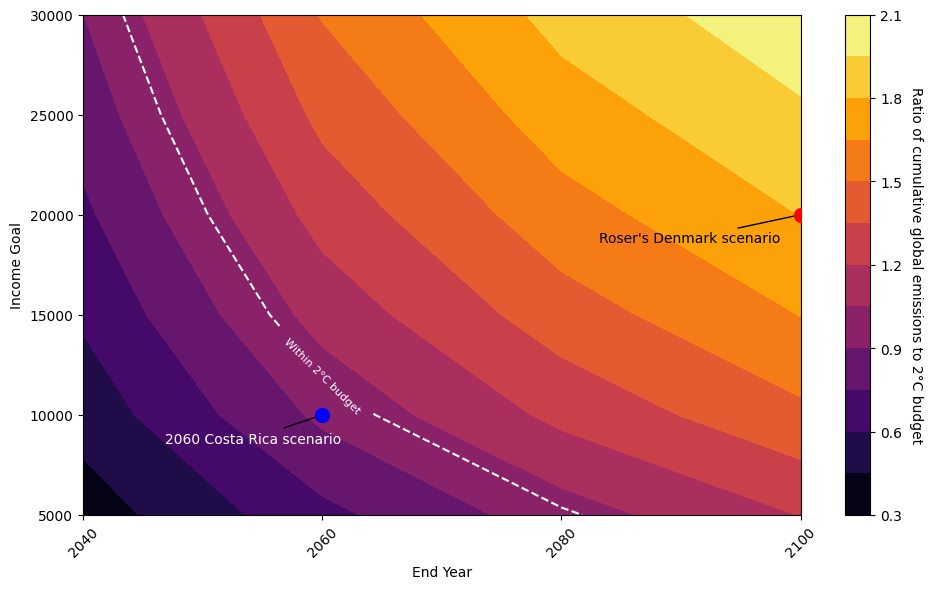

In [4]:
# calculate how much emissions are emitted in a given scenario run and how far above this is the carbon budget by summing the yearly emissions of all countries
from scenariosweeper_class import ScenarioSweeper


# Example usage:
end_year_values = [2040, 2060, 2080, 2100]
income_goal_values = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values = [1150]
gdp_assumption_values = ["constant_ratio"]
sweeper1 = ScenarioSweeper(end_year_values, income_goal_values, carbon_budget_values, gdp_assumption_values)
output1 = sweeper1.run_scenarios()

# Capture the figure and axes objects
fig, ax = sweeper1.plot_total_emissions_trade_off(output1, ["end_year", "income_goal"])

# Adjust the figure layout to be tight and save the figure at 300 DPI with minimal margins
fig.tight_layout()
fig.savefig("fig1.png", dpi=300, bbox_inches='tight')

# If you want to display the figure in an external plotting context
plt.show(fig)



### Run Roser and Costa Rica scenario and look at economic growth rates distribution in each scenario, as well as the distribution of fair share overshoots per country in costa rica and roser scenario

    country_code  growth_trend_2012_to_2022
0            AGO                  -0.030023
1            ALB                   0.032715
2            ARE                   0.022539
3            ARM                   0.045502
4            AUS                   0.009917
..           ...                        ...
145          WSM                  -0.010086
146          XKX                   0.045725
147          ZAF                  -0.002821
148          ZMB                   0.002711
149          ZWE                  -0.004543

[150 rows x 2 columns]


'\nprint(scenario_cr.countries)\n\n# Initialize a figure and axes object for plotting\nfig, ax = plt.subplots(figsize=(10, 5))\n\n# Plot the growth rates distribution for both scenarios on the same axes\nPlots(scenario_cr).plot_growth_rates_distribution(ax=ax)  # Plot for Costa Rica scenario\nPlots(scenario_dk).plot_growth_rates_distribution(ax=ax)  # Plot for Denmark scenario\n\n# Set the title and labels for the axes\nax.set_xlabel("National Economic Growth Rate")\nax.set_ylabel("Density")\nax.legend(["Costa Rica Scenario", "Denmark Scenario"], loc ="center right")\n\n # List of countries which should be indicated specifically\ninteresting_countries = ["United States", "Nigeria"]\n\n# Offset for text annotation to avoid overlapping with the line\ntext_offset = 0.01\n\nfor country in interesting_countries:\n    cagr_cr = Plots(scenario_cr).scenario.countries[country].cagr_average\n    cagr_dk = Plots(scenario_dk).scenario.countries[country].cagr_average\n\n    # Plot the lines without

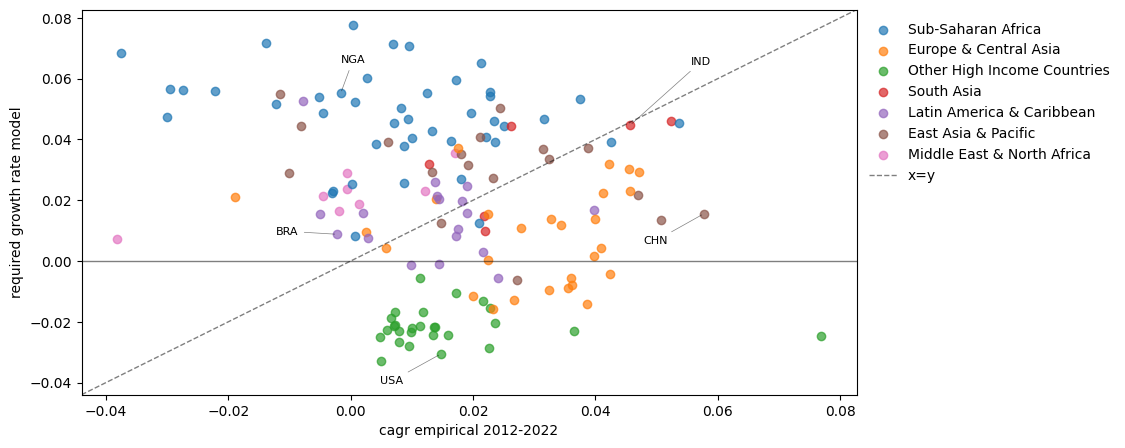

In [5]:
# set up a costa rica scenario
scenario_params_cr = {"end_year": 2060,
                   "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2        
                   "gdp_assumption": "constant_ratio", #this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
            }


# set up a denmark scenario
scenario_params_dk = {"end_year": 2100,
                   "income_goal": 20000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2        
                   "gdp_assumption": "constant_ratio", #this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
            }


# run the costa rica scenario
scenario_cr = Scenario(scenario_params_cr)
scenario_cr.run()


# run the denmark scenario
scenario_dk = Scenario(scenario_params_dk)
scenario_dk.run()

fig, ax = plt.subplots(figsize=(10, 5))
Plots(scenario_cr).plot_growth_rates_vs_reality(ax=ax) # Plot for Costa Rica scenario







"""
print(scenario_cr.countries)

# Initialize a figure and axes object for plotting
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the growth rates distribution for both scenarios on the same axes
Plots(scenario_cr).plot_growth_rates_distribution(ax=ax)  # Plot for Costa Rica scenario
Plots(scenario_dk).plot_growth_rates_distribution(ax=ax)  # Plot for Denmark scenario

# Set the title and labels for the axes
ax.set_xlabel("National Economic Growth Rate")
ax.set_ylabel("Density")
ax.legend(["Costa Rica Scenario", "Denmark Scenario"], loc ="center right")

 # List of countries which should be indicated specifically
interesting_countries = ["United States", "Nigeria"]

# Offset for text annotation to avoid overlapping with the line
text_offset = 0.01

for country in interesting_countries:
    cagr_cr = Plots(scenario_cr).scenario.countries[country].cagr_average
    cagr_dk = Plots(scenario_dk).scenario.countries[country].cagr_average

    # Plot the lines without labels
    ax.axvline(x=cagr_cr, color="tab:blue", linestyle="--")
    ax.axvline(x=cagr_dk, color="tab:orange", linestyle="--")

    # Annotate the Costa Rica scenario line
    ax.text(cagr_cr, ax.get_ylim()[1] * 0.95, f"{country} (CR)",
            verticalalignment='top', color="tab:blue")

    # Annotate the Denmark scenario line
    ax.text(cagr_dk, ax.get_ylim()[1] * 0.9, f"{country} (DK)",
            verticalalignment='top', color="tab:orange")
#
"""